# Tensorflow Practice

This notebook contains our practice work in training a neural network to do binary classification.


In [108]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import random
import pandas
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt

Run this python file to generate all the datasets used:

In [122]:
%run -i 'build_simple_example.py'

In [123]:
# These tests are all binary classifiers, so the number of labels = 2
num_labels = 2

In [111]:
# Use the method to draw the image
def draw_image(x_data):
    x_0 = []
    x_1 = []
    y_0 = []
    y_1 = []

    for row in x_data:
        x = row[2]
        y = row[3]
        color = row[4]
        if color == 0:
            x_0.append(x)
            y_0.append(y)
        else:
            x_1.append(x)
            y_1.append(y)

    plt.scatter(x_0, y_0, c = "red")
    plt.scatter(x_1, y_1, c = "blue")

    plt.axis('equal')
    plt.show()

In [112]:
def generate_dataset(filename):
    col_names = ['ts','user','x_coordinate','y_coordinate','color', 'label']
    data = pandas.read_csv(filename, names = col_names, header=None, skiprows=1)

    return data

In [113]:
def extract_data(filename, num_labels):
    data = generate_dataset(filename)
    dim = data.ts.values.shape[0]
    dataset_x = np.concatenate((data.ts.values.reshape(dim,1),
                              data.user.values.reshape(dim,1),
                              data.x_coordinate.values.reshape(dim,1),
                              data.y_coordinate.values.reshape(dim,1),
                              data.color.values.reshape(dim,1)), axis=1)
    dataset_y = np.zeros((dim,num_labels))
    for i in range(dim):
        dataset_y[i][data.label.values[i]] = 1
    return dataset_x, dataset_y, dataset_x.shape[0]

In [124]:
def create_training_and_testing_sets(x_data, y_data, shape, num_test_points):
    test_indexes = random.sample(range(0, shape), num_test_points )


    train_indexes = np.setdiff1d(list(range(0,shape)),test_indexes)
    train_x = x_data[train_indexes]
    train_y = y_data[train_indexes]

    test_x = x_data[test_indexes]
    test_y = y_data[test_indexes]

    return train_x, train_y, test_x, test_y

In [136]:
def build_model():
    x = tf.placeholder(tf.float32, shape=(None, 5), name='x')    
    y = tf.placeholder(tf.float32, shape=(None, num_labels), name='y') 
    
    W1 = tf.Variable(tf.random_normal([5, 128], stddev = 0.01), name='W1')
    b1 = tf.Variable(tf.random_normal([128], stddev = 0.01), name='b1')
    
    W2 = tf.Variable(tf.random_normal([128, num_labels], stddev=0.01), name='W2')
    b2 = tf.Variable(tf.random_normal([num_labels], stddev = 0.01), name='b2')

    
    hidden_out = tf.add(tf.matmul(x, W1), b1)
    hidden_out = tf.nn.relu(hidden_out)
    
    logits = tf.add(tf.matmul(hidden_out, W2), b2)
    prediction = tf.nn.softmax(logits)
    y_clipped = tf.clip_by_value(prediction, 1e-10, 0.9999999)
    
    loss = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped) + (1 - y) * tf.log(1 - y_clipped), axis=1))
    
    train_op = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(loss)
    init = tf.global_variables_initializer()

    correct_prediction = tf.equal(tf.argmax(prediction, 1, name="Argmax_Pred"), tf.argmax(y, 1, name="Y_Pred"), name="Correct_Pred")
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32, name="Cast_Corr_Pred"), name="Accuracy")
    
    return x, y, init, train_op, loss, accuracy

In [137]:
def run(x, y, init, train_op, loss, accuracy, train_x, train_y, test_x, test_y):

    with tf.Session() as sess:
        sess.run(init)
        feed_dict = {x: train_x, y: train_y}
        test_dict = {x: test_x, y: test_y}
        
        error_increases = 0
        old_loss = 0
        for i in range(2000):
            #print('EPOCH', i)
            _, loss_val = sess.run([train_op, loss], feed_dict)
            
            if i % 1000 == 0:
                print("loss:", loss_val)

        print("Training Accuracy:", sess.run( accuracy, feed_dict))
        print("Testing Accuracy:", sess.run( accuracy, test_dict))

The first dataset tested is two solid colored blocks placed to the left and the right of each other. The image is 100x100 pixels.

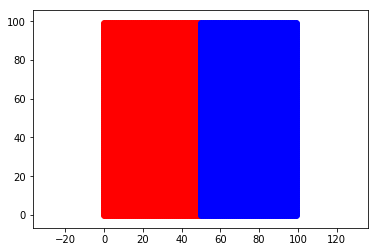

In [132]:
data_x, data_y, shape = extract_data('two_blocks_lr.txt', num_labels)

# Randomly take 9000 pixels to test on. The training set is only 1000
train_x, train_y, test_x, test_y = create_training_and_testing_sets(x_data, y_data, shape, 9000)
draw_image(data_x)

First, we trained and ran the data on the entire dataset, then tested on the entire dataset. We ran 2000 Epochs and printed the loss every 1000 epochs.
We did this 20 times.

In [133]:
for i in range(20):
    print("Iteration: ", i )
    x, y, init, train_op, loss, accuracy = build_model()
    run(x, y, init, train_op, loss, accuracy, data_x, data_y, data_x, data_y)

Iteration:  0
loss: 1.3907295
loss: 0.41007587
Training Accuracy: 0.9114
Testing Accuracy: 0.9114
Iteration:  1
loss: 1.40876
loss: 0.40461528
Training Accuracy: 0.9839
Testing Accuracy: 0.9839
Iteration:  2
loss: 1.3998044
loss: 0.41138417
Training Accuracy: 0.9113
Testing Accuracy: 0.9113
Iteration:  3
loss: 1.4119204
loss: 0.40955034
Training Accuracy: 0.9081
Testing Accuracy: 0.9081
Iteration:  4
loss: 1.3511932
loss: 0.411587
Training Accuracy: 0.9091
Testing Accuracy: 0.9091
Iteration:  5
loss: 1.3126315
loss: 0.40387452
Training Accuracy: 0.9839
Testing Accuracy: 0.9839
Iteration:  6
loss: 1.4133055
loss: 0.40308765
Training Accuracy: 0.9842
Testing Accuracy: 0.9842
Iteration:  7
loss: 1.3960882
loss: 0.40908298
Training Accuracy: 0.912
Testing Accuracy: 0.912
Iteration:  8
loss: 1.4060487
loss: 0.4113
Training Accuracy: 0.9115
Testing Accuracy: 0.9115
Iteration:  9
loss: 1.3925803
loss: 0.41226068
Training Accuracy: 0.912
Testing Accuracy: 0.912
Iteration:  10
loss: 1.3932458
l

Aftwards, we extracted 9000 datapoints for testing and trained on 1000

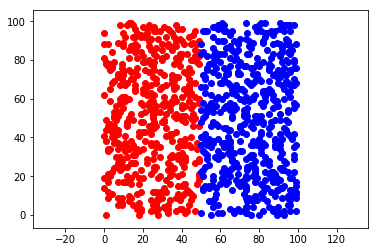

In [134]:
draw_image(train_x)

In [135]:
for i in range(20):
    print("Iteration: ", i )
    x, y, init, train_op, loss, accuracy = build_model()
    run(x, y, init, train_op, loss, accuracy, train_x, train_y, test_x, test_y)

Iteration:  0
loss: 1.3789592
loss: 0.39608204
Training Accuracy: 0.914
Testing Accuracy: 0.9067778
Iteration:  1
loss: 1.36475
loss: 0.40013018
Training Accuracy: 0.915
Testing Accuracy: 0.90644443
Iteration:  2
loss: 1.3667964
loss: 0.39618602
Training Accuracy: 0.915
Testing Accuracy: 0.9068889
Iteration:  3
loss: 1.4210991
loss: 0.39241028
Training Accuracy: 0.979
Testing Accuracy: 0.9763333
Iteration:  4
loss: 1.3777813
loss: 0.39062914
Training Accuracy: 0.978
Testing Accuracy: 0.9738889
Iteration:  5
loss: 1.3740519
loss: 0.39760026
Training Accuracy: 0.915
Testing Accuracy: 0.9061111
Iteration:  6
loss: 1.3948182
loss: 0.39865205
Training Accuracy: 0.915
Testing Accuracy: 0.9071111
Iteration:  7
loss: 1.4059289
loss: 0.39167506
Training Accuracy: 0.98
Testing Accuracy: 0.9765555
Iteration:  8
loss: 1.3871633
loss: 0.39100018
Training Accuracy: 0.978
Testing Accuracy: 0.976
Iteration:  9
loss: 1.350947
loss: 0.3897513
Training Accuracy: 0.98
Testing Accuracy: 0.9764444
Iteration

Next we also tested with the two colors on top of each other and on two opposite sides of a diagonal.

In [ ]:
data_x, data_y, shape = extract_data('two_blocks_lr.txt', num_labels)

# Randomly take 9000 pixels to test on. The training set is only 1000
train_x, train_y, test_x, test_y = create_training_and_testing_sets(x_data, y_data, shape, 9000)
draw_image(data_x)

In [ ]:
When doing the real data, user id is kinda useless. You want to have a vector instead that is the embedding of the user, such as interactions of the user and information about the user. Maybe the top projects they participated in or their relation to other users.
TAke a small sample square of the data with a few pictures in it.
Read the paper and make it better
Clean and organize the notebook

If i given all the updates, how do i cluster them so that they form the images
EX: from 10000 updates, 100 images were built. Then i will train my model and be able to tell if it can perfectly find the images